<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Pallavi_Vaswani_day2_Machine_learning_boot_camp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Reading the dataset

In [24]:
import pandas as pd
df= pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Aim: To predict median house values in Californian districts, given a number of features from these districts.**bold text**

In [25]:
#finding missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 null values in the total_bedrooms column


In [26]:
import numpy as np
df['total_bedrooms'].fillna(np.round(df['total_bedrooms'].mean (),1), inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


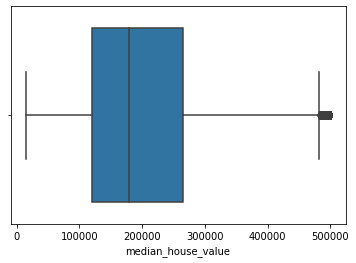

In [28]:
#finding the outliers in the MEDIAN HOUSE VALUE COLUMN and testing the skewness.
import seaborn as sns
sns.boxplot(df['median_house_value'])

Inference from plot:
Smallest value and the largest value are seen at the end of the
whisker and it determines the range. The box-plot is the inter-quartile range (Q3-Q1).
A box plot consist of 5 things.

- Minimum
- First Quartile (Q1) or 25%
- Median (Second Quartile, Q2) or 50%
- Third Quartile (Q3) or 75%
- Maximum

1. The median value of 'MEDIAN HOUSE VALUE' COLUMN is around 1 lakh 80 thousand.
2. Since the middle line in the box plot is towards the left, the data in this column is positively skewed.
3. Outliers lie in range of 4 lakhs 80 thousand to 5 lakhs.

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870848,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


DATA Visualization

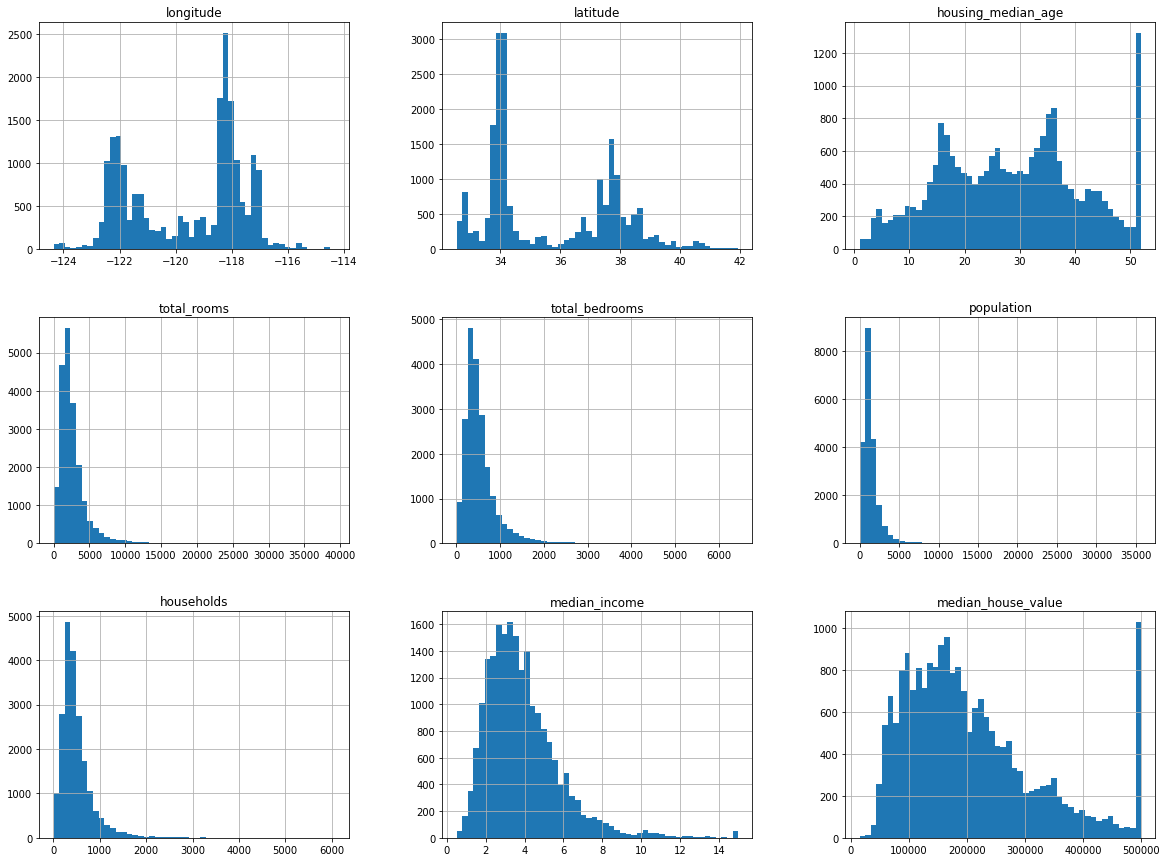

In [30]:
df.hist(bins=50, figsize=(20,15))
plt.show()


In [31]:
#Visualization of Caterogical column- 'Ocean_proximity'

In [32]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

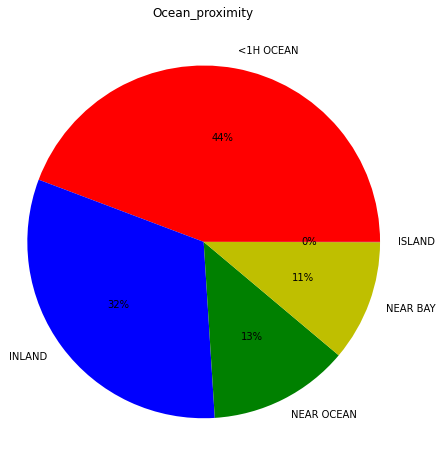

In [33]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(7,8))
data=df['ocean_proximity'].value_counts(normalize=True) *100
label='<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'
col=['r','b','g','y','m']
plt.pie(data,labels=label, colors=col,autopct='%1.0f%%')
plt.title('Ocean_proximity')
plt.axis('equal')
plt.show()

CORRELATION

In [34]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

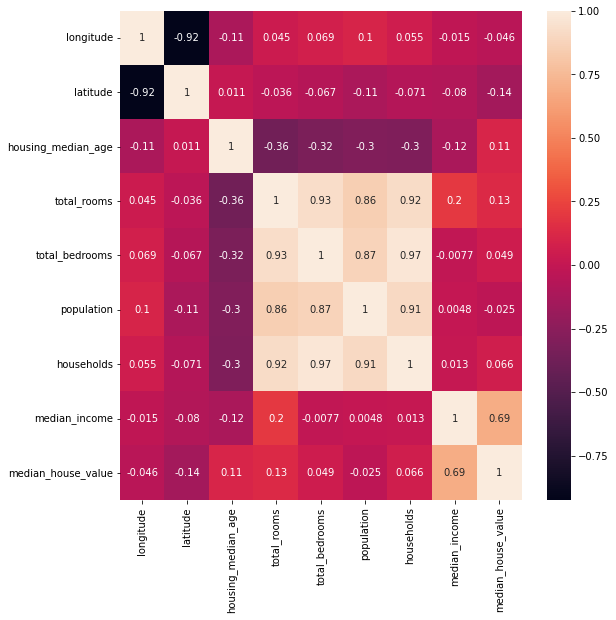

In [35]:
#create a heatmap 
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

Normality testing

Hypothesis= 'median_house_value' comes from a normal distribution

In [36]:
from scipy import stats
stats.normaltest(df['median_house_value'])

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

Since pvalue =0, the null hypothesis can be rejected. That means the data is not normally distributed.
Therefore, we will perform non-parametric test- Chi-square test.

In [37]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['median_house_value'], df['median_income'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  53276770.92236957
pvalue:  0.0
degree of freedom:  49652607
expected values:  [[2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 ...
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [1.56976744e-02 1.30813953e-02 1.30813953e-03 ... 1.30813953e-03
  2.61627907e-03 6.40988372e-02]
 [5.61046512e-01 4.67538760e-01 4.67538760e-02 ... 4.67538760e-02
  9.35077519e-02 2.29093992e+00]]


Hypothesis= median house value and median house income are independent.
since p value is >0.05, null hypothesis is rejected, there is no statistical difference between them.

In [38]:
#converting ocean_proximity to numeric
df['ocean_proximity'].replace(['<1H OCEAN', 'INLAND', 'NEAR OCEAN','NEAR BAY','ISLAND'], [1,2,3,4,5], inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [39]:
df["ocean_proximity"].value_counts()

1    9136
2    6551
3    2658
4    2290
5       5
Name: ocean_proximity, dtype: int64

In [40]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Dropping all the non-correlated variables.

In [41]:
df.drop(columns = ['households', 'total_bedrooms','ocean_proximity','population','longitude','latitude'], inplace=True)
df

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.3252,452600.0
1,21.0,7099.0,8.3014,358500.0
2,52.0,1467.0,7.2574,352100.0
3,52.0,1274.0,5.6431,341300.0
4,52.0,1627.0,3.8462,342200.0
...,...,...,...,...
20635,25.0,1665.0,1.5603,78100.0
20636,18.0,697.0,2.5568,77100.0
20637,17.0,2254.0,1.7000,92300.0
20638,18.0,1860.0,1.8672,84700.0


In [42]:
#Machine Learning Models
#Splitting the dataset into the Training set and Test set
x = df[['housing_median_age', 'total_rooms', 'median_income']]
y = df['median_house_value']

In [43]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [45]:
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = model1.predict(x_test)

In [47]:
r1 = r2_score(y_test, y_pred)
print('The R2 of model1 is :',r1)

The R2 of model1 is : 0.49781934308497966


In [48]:
# Evaluation metrics

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred) 
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:",mape)

Results of sklearn.metrics:
MAE: 60491.48795720673
MSE: 6695257302.871909
RMSE: 81824.55195643853
R-Squared: 0.49781934308497966
MAPE: 0.3766855714850822


Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
y_pred = regressor.predict(x_test)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12543068048640837

RANDOM FOREST REGRESSION

HYPER-PARAMATER TUNING

In [54]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(2,101)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(2,31,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(2,51,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.arange(2,51,2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'bootstrap': [True, False]}


RANDOMIZED SEARCH AND MODEL BUILDING

In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_bestfit = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_bestfit.fit(x_train, y_train)

rf_bestfit.best_params_ # These are the parameters that we are setting to our model to get the best possible accuracy

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 60,
 'min_samples_split': 48,
 'min_samples_leaf': 26,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [58]:
# Run this, to avoid RandomizedSearch since we already have the parameters
from sklearn.ensemble import RandomForestRegressor
rf_bestfit = RandomForestRegressor(n_estimators= 60,
 min_samples_split= 48,
 min_samples_leaf= 26,
 max_features= 'auto',
 max_depth= 10,
 bootstrap= True,random_state=42)
rf_bestfit = rf_bestfit.fit(x_train,y_train)
prediction = rf_bestfit.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'prediction')

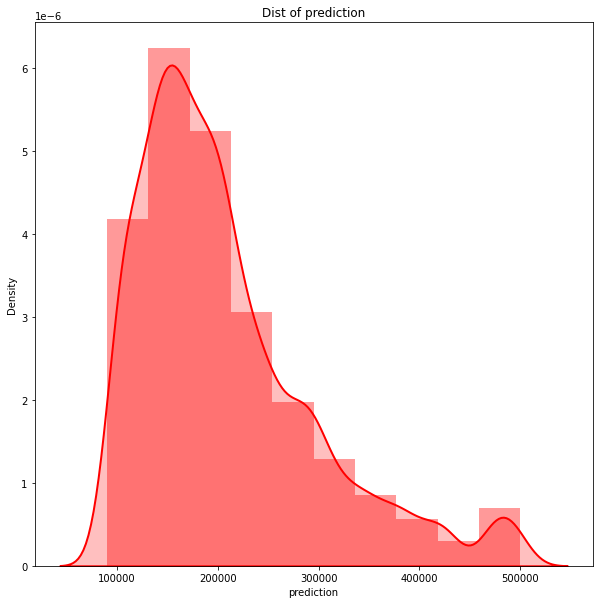

In [59]:
# Checking the distribution of prediction
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(10, 10))
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(prediction, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax,bins=10)
ax.title.set_text('Dist of prediction')
ax.set_xlabel('prediction')

Model Evaluation

In [61]:
# score on Training data 
print(rf_bestfit.score(x_train,y_train))

0.6078269279837409


In [62]:
# score on Test data
print(rf_bestfit.score(x_test,y_test))

0.5432435436524224


In [63]:
# Evaluation metrics

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,prediction) 
mape = metrics.mean_absolute_percentage_error(y_test, prediction)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:",mape)

Results of sklearn.metrics:
MAE: 56997.32285782121
MSE: 6089645146.393023
RMSE: 78036.17844559677
R-Squared: 0.5432435436524224
MAPE: 0.3567090339348336
